# Local_automatic_mask_generator_example(FROM SAM)

## Environment installation and configuration

In [ ]:
using_colab = True
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import sys
import os
from skimage.io import imread, imshow
from google.colab import drive
drive.mount('/content/drive')
TRAIN_PATH = '/content/drive/MyDrive/'
TRAIN_PATH_Y = '/content/drive/MyDrive/mask/'
TEST_PATH = '/content/drive/MyDrive/test/'
TEST_MASK_PATH = '/content/drive/MyDrive/test_mask/'

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-6iomxu4k
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-6iomxu4k
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=d44a641d70acb12cad41b9a39dc2c6b22eeabc39f797c9dc0bfbc95d55df20e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ghbzxgg/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segm

## Example image

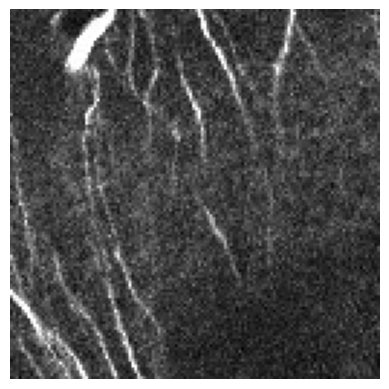

In [ ]:
image = cv2.imread('drive/MyDrive/1/1-20.png')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.figure(figsize=(2,2))
plt.imshow(image)
plt.axis('off')
plt.show()

## Automatic mask generation

To generate masks, just run `generate` on an image.

In [ ]:
masks = mask_generator.generate(image)

Mask generation returns a list over masks, where each mask is a dictionary

containing various data about the mask. These keys are:
* `segmentation` : the mask
* `area` : the area of the mask in pixels
* `bbox` : the boundary box of the mask in XYWH format
* `predicted_iou` : the model's own prediction for the quality of the mask
* `point_coords` : the sampled input point that generated this mask
* `stability_score` : an additional measure of mask quality
* `crop_box` : the crop of the image used to generate this mask in XYWH format

Show all the masks overlayed on the image.

After screening, suitable masks will be taken or stored on a new negative.

/content/drive/MyDrive/1/1-0.png
/content/drive/MyDrive/1/1-1.png
/content/drive/MyDrive/1/1-10.png
/content/drive/MyDrive/1/1-100.png
/content/drive/MyDrive/1/1-101.png
/content/drive/MyDrive/1/1-102.png
/content/drive/MyDrive/1/1-103.png
/content/drive/MyDrive/1/1-104.png
/content/drive/MyDrive/1/1-105.png
/content/drive/MyDrive/1/1-106.png
/content/drive/MyDrive/1/1-107.png
/content/drive/MyDrive/1/1-108.png
/content/drive/MyDrive/1/1-109.png
/content/drive/MyDrive/1/1-11.png
/content/drive/MyDrive/1/1-110.png
/content/drive/MyDrive/1/1-111.png
/content/drive/MyDrive/1/1-112.png
/content/drive/MyDrive/1/1-113.png
/content/drive/MyDrive/1/1-114.png
/content/drive/MyDrive/1/1-115.png
/content/drive/MyDrive/1/1-116.png
/content/drive/MyDrive/1/1-117.png
/content/drive/MyDrive/1/1-118.png
/content/drive/MyDrive/1/1-119.png
/content/drive/MyDrive/1/1-12.png
/content/drive/MyDrive/1/1-120.png
/content/drive/MyDrive/1/1-121.png
/content/drive/MyDrive/1/1-122.png
/content/drive/MyDrive/1/1-

<ipython-input-10-6d1797159275>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(frameon=False)


/content/drive/MyDrive/1-117-mask.png
/content/drive/MyDrive/1-120-mask.png
/content/drive/MyDrive/1-126-mask.png
/content/drive/MyDrive/1-130-mask.png
/content/drive/MyDrive/1-131-mask.png
/content/drive/MyDrive/1-132-mask.png
/content/drive/MyDrive/1-133-mask.png
/content/drive/MyDrive/1-138-mask.png
/content/drive/MyDrive/1-142-mask.png
/content/drive/MyDrive/1-143-mask.png
/content/drive/MyDrive/1-144-mask.png
/content/drive/MyDrive/1-148-mask.png
/content/drive/MyDrive/1-152-mask.png
/content/drive/MyDrive/1-156-mask.png
/content/drive/MyDrive/1-159-mask.png
/content/drive/MyDrive/1-161-mask.png
/content/drive/MyDrive/1-162-mask.png
/content/drive/MyDrive/1-167-mask.png
/content/drive/MyDrive/1-168-mask.png
/content/drive/MyDrive/1-169-mask.png
/content/drive/MyDrive/1-174-mask.png
/content/drive/MyDrive/1-178-mask.png
/content/drive/MyDrive/1-181-mask.png
/content/drive/MyDrive/1-182-mask.png
/content/drive/MyDrive/1-183-mask.png
/content/drive/MyDrive/1-184-mask.png
/content/dri

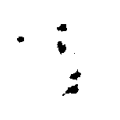

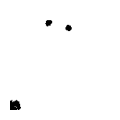

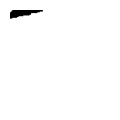

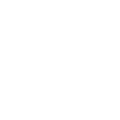

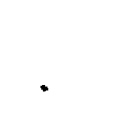

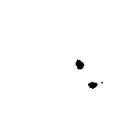

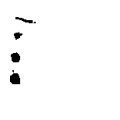

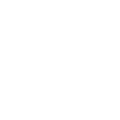

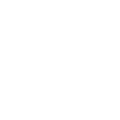

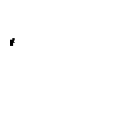

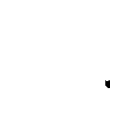

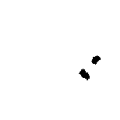

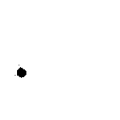

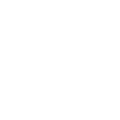

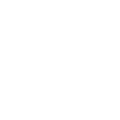

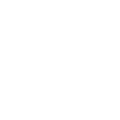

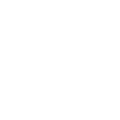

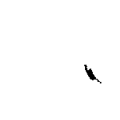

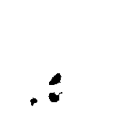

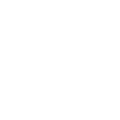

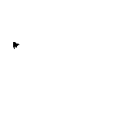

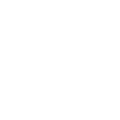

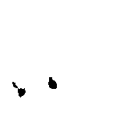

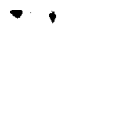

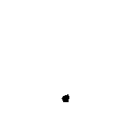

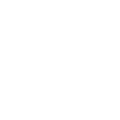

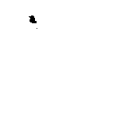

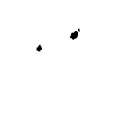

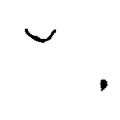

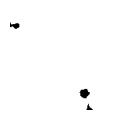

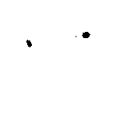

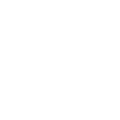

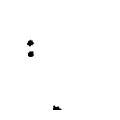

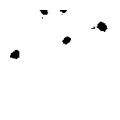

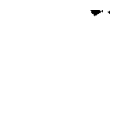

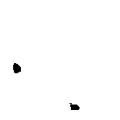

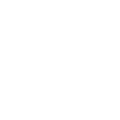

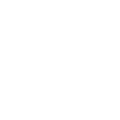

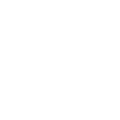

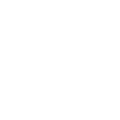

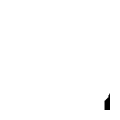

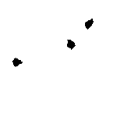

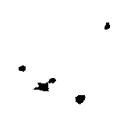

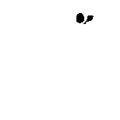

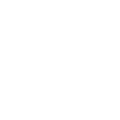

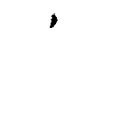

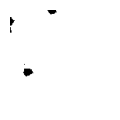

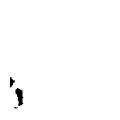

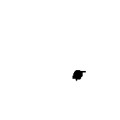

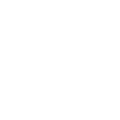

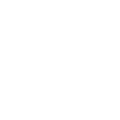

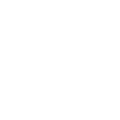

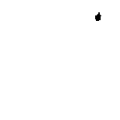

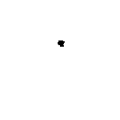

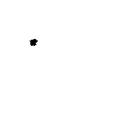

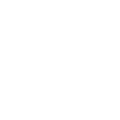

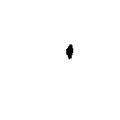

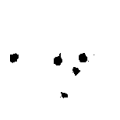

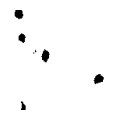

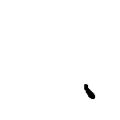

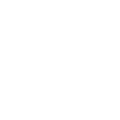

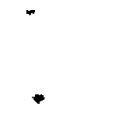

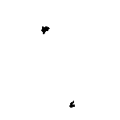

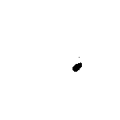

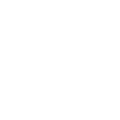

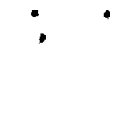

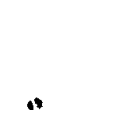

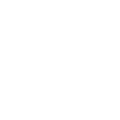

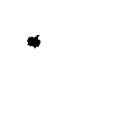

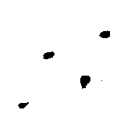

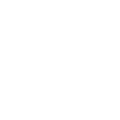

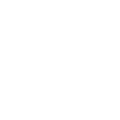

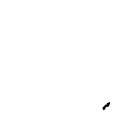

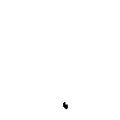

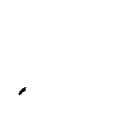

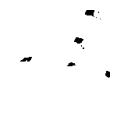

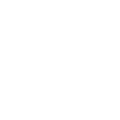

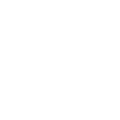

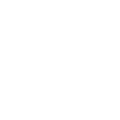

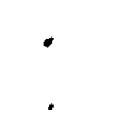

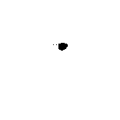

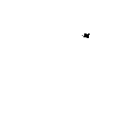

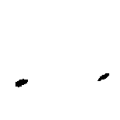

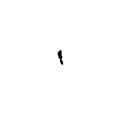

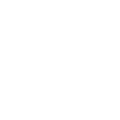

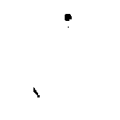

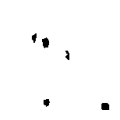

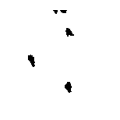

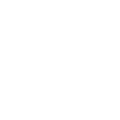

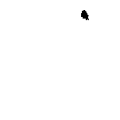

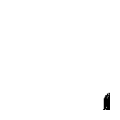

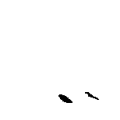

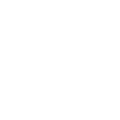

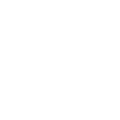

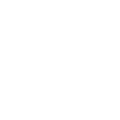

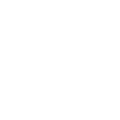

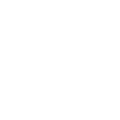

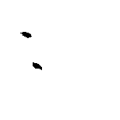

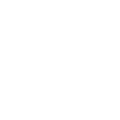

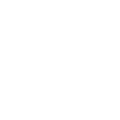

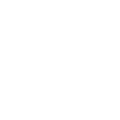

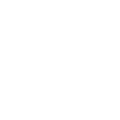

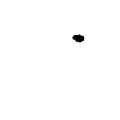

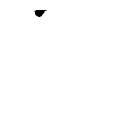

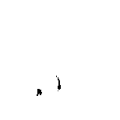

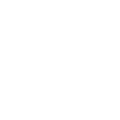

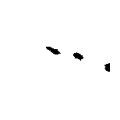

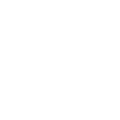

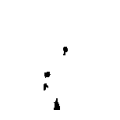

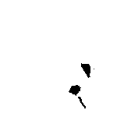

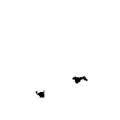

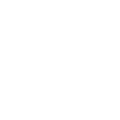

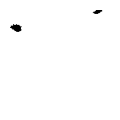

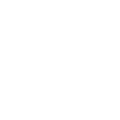

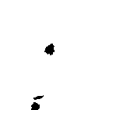

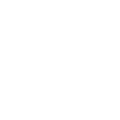

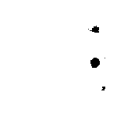

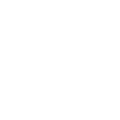

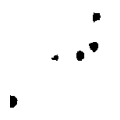

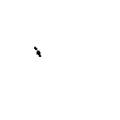

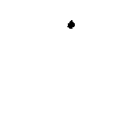

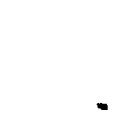

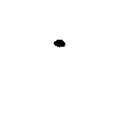

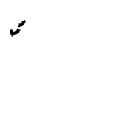

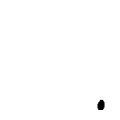

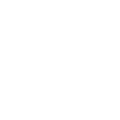

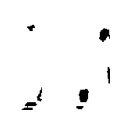

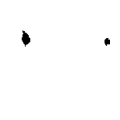

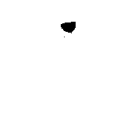

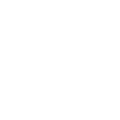

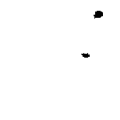

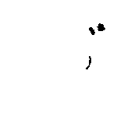

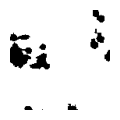

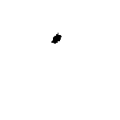

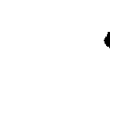

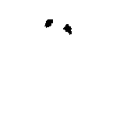

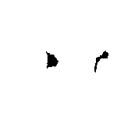

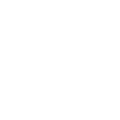

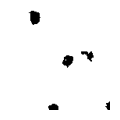

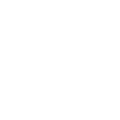

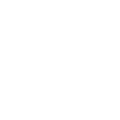

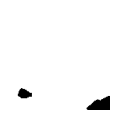

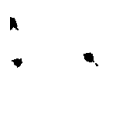

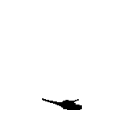

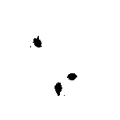

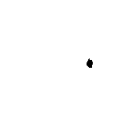

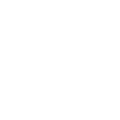

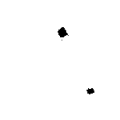

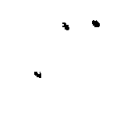

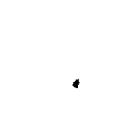

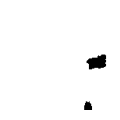

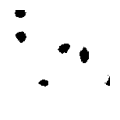

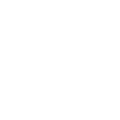

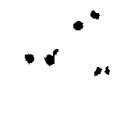

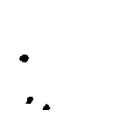

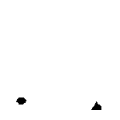

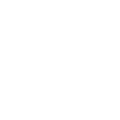

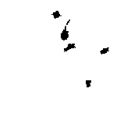

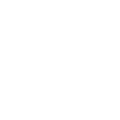

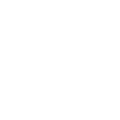

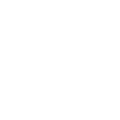

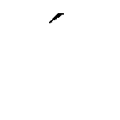

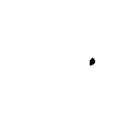

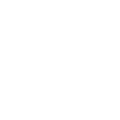

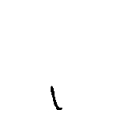

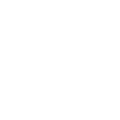

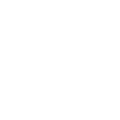

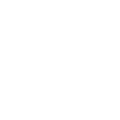

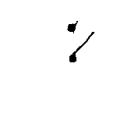

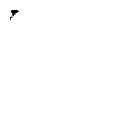

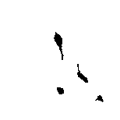

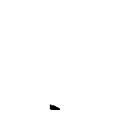

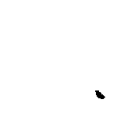

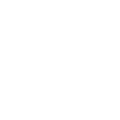

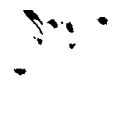

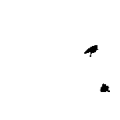

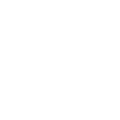

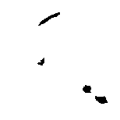

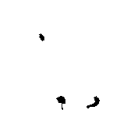

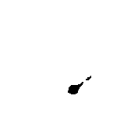

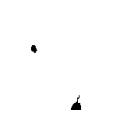

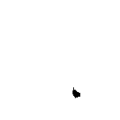

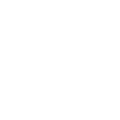

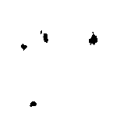

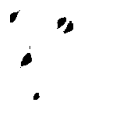

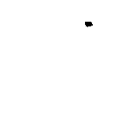

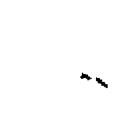

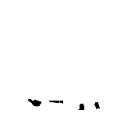

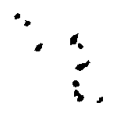

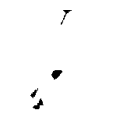

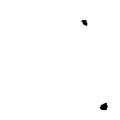

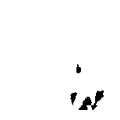

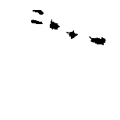

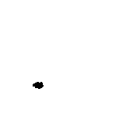

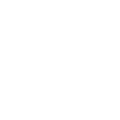

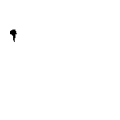

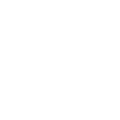

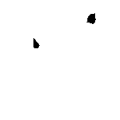

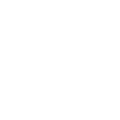

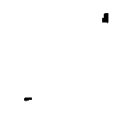

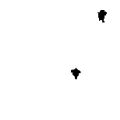

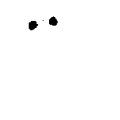

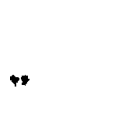

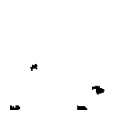

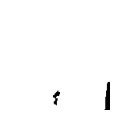

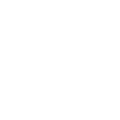

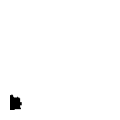

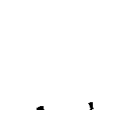

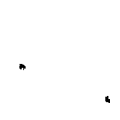

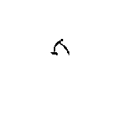

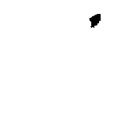

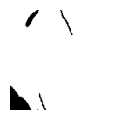

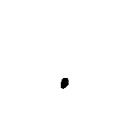

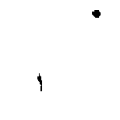

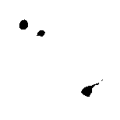

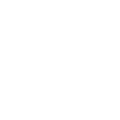

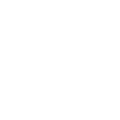

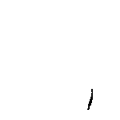

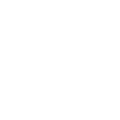

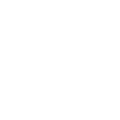

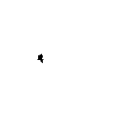

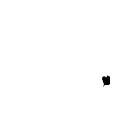

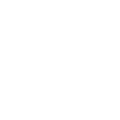

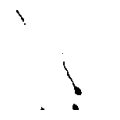

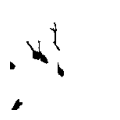

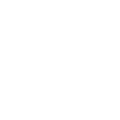

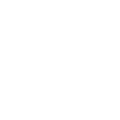

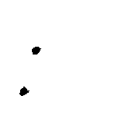

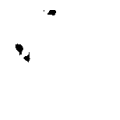

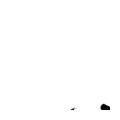

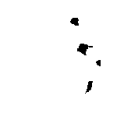

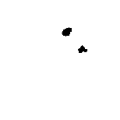

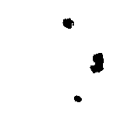

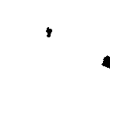

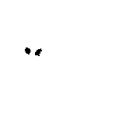

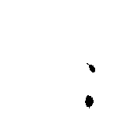

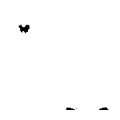

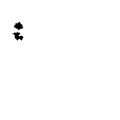

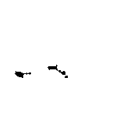

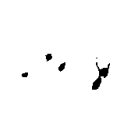

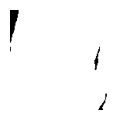

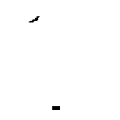

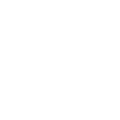

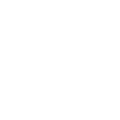

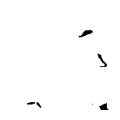

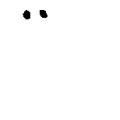

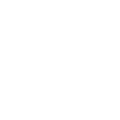

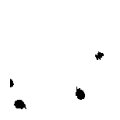

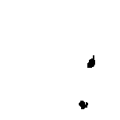

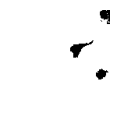

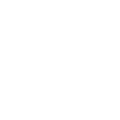

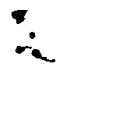

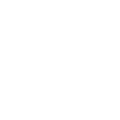

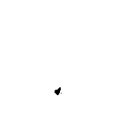

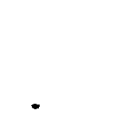

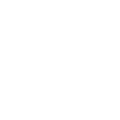

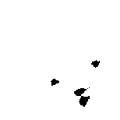

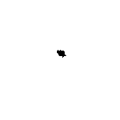

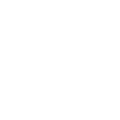

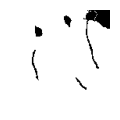

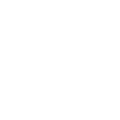

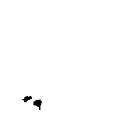

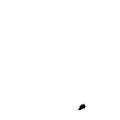

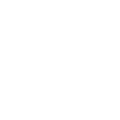

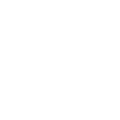

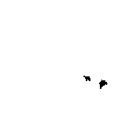

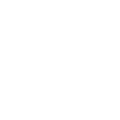

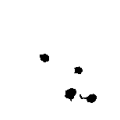

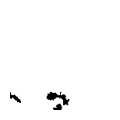

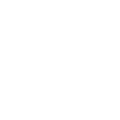

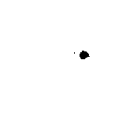

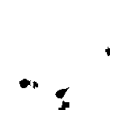

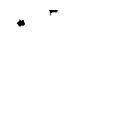

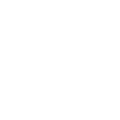

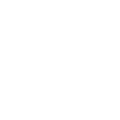

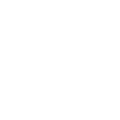

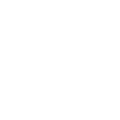

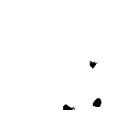

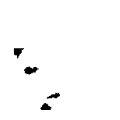

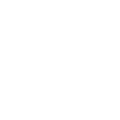

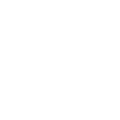

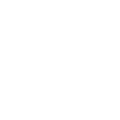

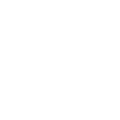

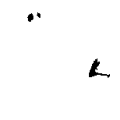

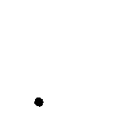

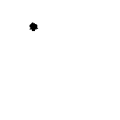

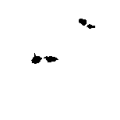

In [ ]:
area_level = [35,35,100,100,45]
level = [168,168,192,168,176]

image = Image.new("RGB", (128, 128), (255, 255, 255))
for i in range(1,2):

  unp_ids = next(os.walk(TRAIN_PATH+str(i)))[2]
  unp_ids.sort()
  Unprocessed = np.zeros((len(unp_ids),128,128,3),dtype = np.uint8)
  for n,id_ in enumerate(unp_ids):
      path = TRAIN_PATH + str(i)+ '/' + id_
      print(path)
      img = imread(path)
      img = img[..., :3]
      Unprocessed[n] = img

  for n,id_ in enumerate(unp_ids):
    temp = Unprocessed[n]
    temp[temp<=level[i]]= 0
    masks = mask_generator.generate(temp)

    temp = np.zeros((128,128))
    for num in range(len(masks)):
      if ((masks[num]['area'])>area_level[i]) & ((masks[num]['area'])< 600) & (masks[num]['predicted_iou']>0.85):
        #plt.imshow(masks[i]['segmentation'])
        temp = np.logical_or(temp , masks[num]['segmentation'])
        #plt.show()

    temp = (temp<0.85).astype(np.uint8)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(1,1)

    # cv2.imwrite('/content/drive/MyDrive/'+id_.split('.')[0]+'-mask.png', temp)
    ax=plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    if np.all(temp==1):
      print(TRAIN_PATH+id_.split('.')[0]+'-mask.png')
      image.save('/content/drive/MyDrive/'+str(i)+'/mask/'+id_.split('.')[0]+'-mask.png')
    else:
      plt.imshow(temp , cmap = 'gray')
      plt.savefig('/content/drive/MyDrive/'+str(i)+'/mask/'+id_.split('.')[0]+'-mask.png',dpi=128)


In [ ]:
masks = mask_generator.generate(image)
temp = np.zeros((128,128))
for i in range(len(masks)):
  if ((masks[i]['area'])>200) & ((masks[i]['area'])< 10000) & (masks[i]['predicted_iou']>0.90):
        #plt.imshow(masks[i]['segmentation'])
    temp = np.logical_or(temp , masks[i]['segmentation'])

        #plt.show()
temp = (temp<0.85).astype(np.uint8)
temp = np.zeros((128,128))
cv2.imwrite('image', temp)

True

## Automatic mask generation options

There are several tunable parameters in automatic mask generation that control how densely points are sampled and what the thresholds are for removing low quality or duplicate masks. Additionally, generation can be automatically run on crops of the image to get improved performance on smaller objects, and post-processing can remove stray pixels and holes. Here is an example configuration that samples more masks:

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [ ]:
masks2 = mask_generator_2.generate(image)

In [ ]:
len(masks2)

90

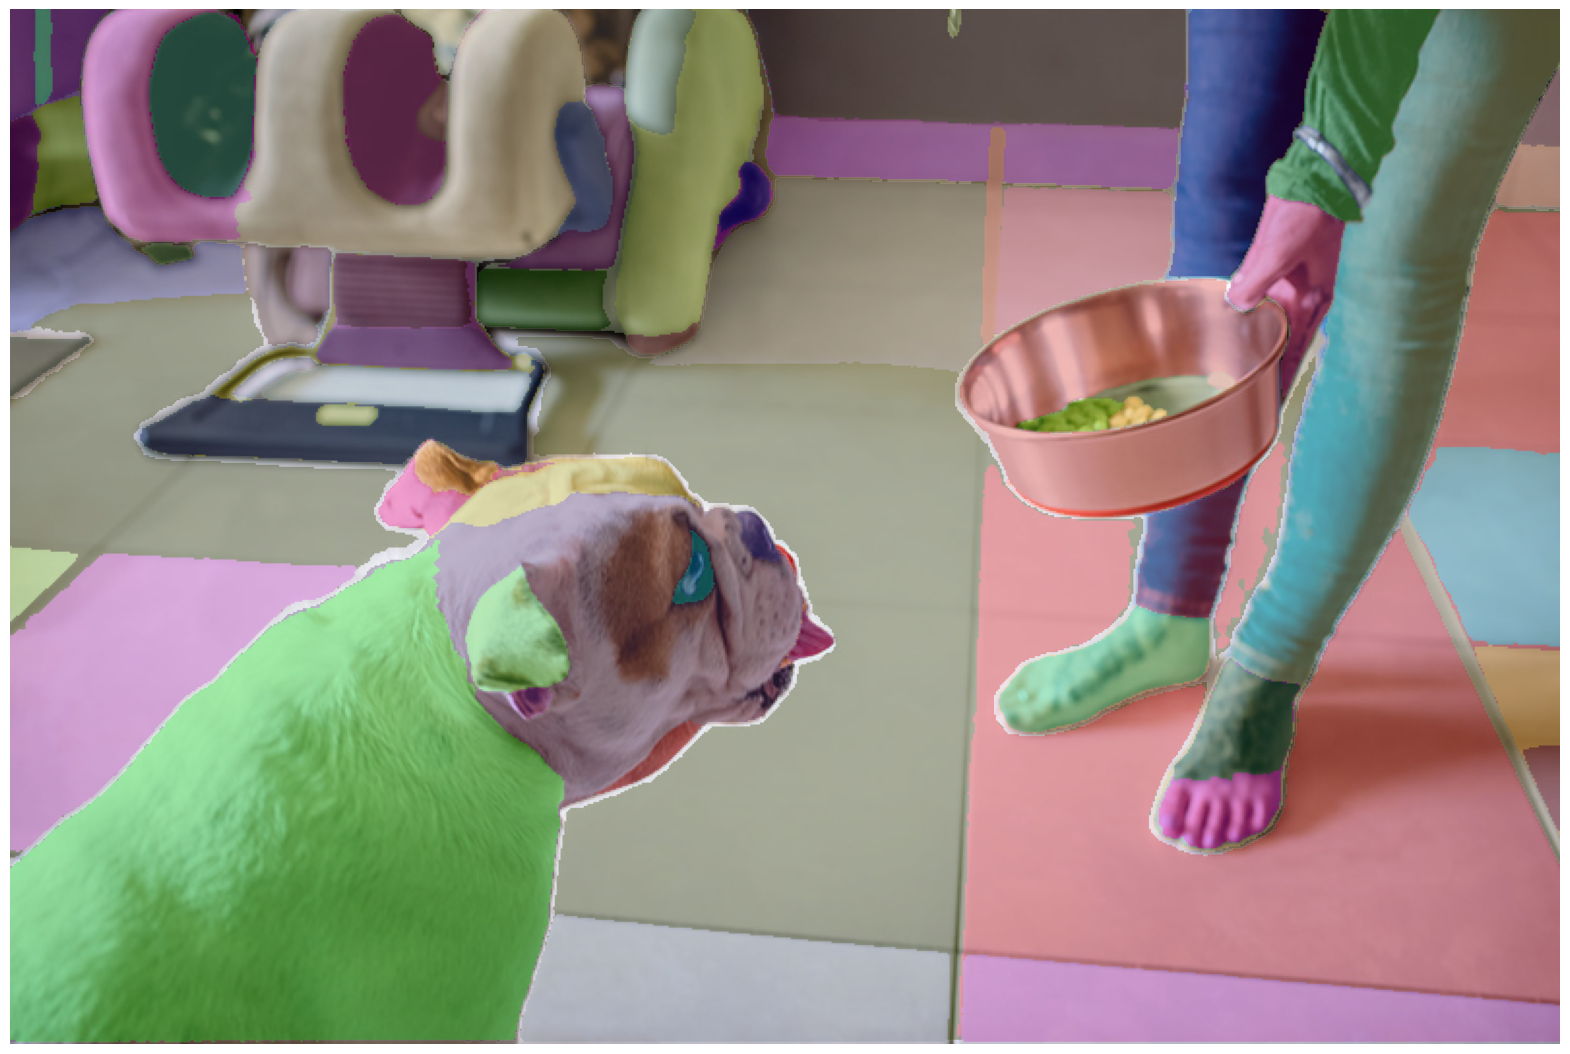

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()